# Distinguishing Song Genre
Golnaz Abrishami, Austin Koenig, & Edwin Ramirez

## Introduction

This study begins with two datasets (`song_data.csv` and `song_info.csv`) taken from the Spotify API. While it is tough to work with two datasets in conjunction, it would be much easier to create a single dataframe from them. So, wielded with a dataframe containing several different numerical and musical properties, the object of this report is to discover some relationship between these properties of the song between genres. For instance, it would be interesting to find that rock music was, in fact, different from country music numerically, despite them being somewhat similar in style and form. 

While unsupervised clustering methods might be ideal for this sort of thing, musical genres and subgenres are defined by people. Thus, it is entirely possible that two songs sound extremely similar, but are different in genre by human standards. 

Accordingly, this study will separate songs into genres by the words found in the name of the playlist in which these songs exist. Then, it will analyse the differences and similarites of these supervised clusters in order to determine how different each genre is from the rest. Finally, the results will be displayed and discussed in some conclusive statements. 

This study is useful to all those who are curious to determine whether they should be confined to only one genre of music, or whether it is safe to venture into the vast infinitum of the musical world. Shall they find solice in another genre? Is there only one genre that will quench their auditory thirst? At the end of this report, they will certainly find out.

### Features of Data

**Song Popularity**

The popularity of an artist's track relative to the rest of their discography. The value will be between 0 and 100, with 100 being the most popular.

The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.

**Song Duration (ms)**

Contains data on the length of time the song is in milliseconds.

**Acousticness**

A measurement from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents highest confidence the track is acoustic.

**Danceability**

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of type float is returned between 0.0 and 1.0, where 0.0 is least danceable and 1.0 is most danceable.

**Energy**

Energy is a measure of type float that is between 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Energetic tracks can be described as fast, loud, and noisy. For example, death metal has high energy, while a slow jazz would register low on the scale.

**Instrumentalness**

Predicts whether a track contains no vocals by returning a value of type float that is between 0.0 and 1.0. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**Liveness**

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**Loudness**

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db

**Audio Mode**

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**Speechiness**

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**Tempo**

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**Time Signature**

An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

**Key Signature**

Key signature is represented on a scale, where integers are mapped to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. 

**Audio Valence**

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**Artist Name**

Artist that wrote the song

**Album Names**
Album that the song was released on

**Playlist**
Playlist that song originates from. **Note: Some songs may be part of multiple playlists**

### Importing Necessary Libraries

The libraries that are needed for this analysis will now be imported.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns
import os

### Preparing the Data

Now, the datasets will be loaded and combined into a single pandas `DataFrame` object with all of the desired features.

In [3]:
songdata_df = DataFrame(pd.read_csv("song_data.csv", index_col = 0))
songinfo_df = DataFrame(pd.read_csv("song_info.csv", index_col = 0))
songs_df = pd.concat([songdata_df, songinfo_df], axis=1)

#### Splitting the Data by Genre

If the dataset is split by genre, then it will be much easier to make distinctions between them since their numerical properties won't be lost in a mist of a multitude of other songs belonging to other genres.

In [16]:
rock_df = songs_df[songs_df['playlist'].str.contains("Rock")]
country_df = songs_df[songs_df['playlist'].str.contains("Country")]
pop_df = songs_df[songs_df['playlist'].str.contains("Pop")]
rap_df = songs_df[(songs_df['playlist'].str.contains("Rap")) | (songs_df['playlist'].str.contains("Hop"))]
alt_df = songs_df[songs_df['playlist'].str.contains("Alternative")]
electronic_df = songs_df[ (songs_df['playlist'].str.contains("House")) | 
                         (songs_df['playlist'].str.contains("Instrumental")) | 
                         (songs_df['playlist'].str.contains("Chill"))]
latin_df = songs_df[(songs_df['playlist'].str.contains("Latin")) | 
                    (songs_df['playlist'].str.contains("Mex")) | 
                    (songs_df['playlist'].str.contains("Columbia")) | 
                    (songs_df['playlist'].str.contains("Puerto")) | 
                    (songs_df['playlist'].str.contains("Brazil")) | 
                    (songs_df['playlist'].str.contains("Salsa")) | 
                    (songs_df['playlist'].str.contains("Bachata")) | 
                    (songs_df['playlist'].str.contains("Regg")) | 
                    (songs_df['playlist'].str.contains("Chicano"))]

# create value counts for each genre
rock_mode = rock_df.audio_mode.value_counts()
country_mode = country_df.audio_mode.value_counts()
pop_mode = pop_df.audio_mode.value_counts()
alt_mode = alt_df.audio_mode.value_counts()
rap_mode = rap_df.audio_mode.value_counts()
latin_mode = latin_df.audio_mode.value_counts()
electronic_mode = electronic_df.audio_mode.value_counts()

# set genres
rock_df["Genre"] = "Rock"
country_df["Genre"] = "Country"
pop_df["Genre"] = "Pop"
rap_df["Genre"] = "Rap"
alt_df["Genre"] = "Alternative"
electronic_df["Genre"] = "Electronic"
latin_df["Genre"] = "Latin"

all_genres_df=pd.concat([latin_df, electronic_df,alt_df,rap_df,pop_df,country_df,rock_df])

#Create column that maps numerical key values to musical notation
conditions = [(all_genres_df['key'] == 0),
              (all_genres_df['key'] == 1),
              (all_genres_df['key'] == 2),
              (all_genres_df['key'] == 3),
              (all_genres_df['key'] == 4),
              (all_genres_df['key'] == 5),
              (all_genres_df['key'] == 6),
              (all_genres_df['key'] == 7),
              (all_genres_df['key'] == 8),
              (all_genres_df['key'] == 9),
              (all_genres_df['key'] == 10),
              (all_genres_df['key'] == 11)]

key_sigs = ["C", "C#", "D", "D#","E", "F", "F#", "G", "G#", "A", "A#", "B"]

all_genres_df['key_note'] = np.select(conditions, key_sigs)

C:\Users\austi\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\austi\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\austi\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

Now, take an initial peek at the data within our new data frame.

In [17]:
all_genres_df.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist,Genre,key_note
song_name,,,,,,,,,,,,,,,,,,,
MIA (feat. Drake),94,210367,0.0143,0.818,0.540,0.000512,6,0.0990,-6.350,0,0.0544,97.064,4,0.174,Bad Bunny,MIA (feat. Drake),100% LatinX,Latin,F#
"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98,212500,0.1530,0.841,0.798,0.000003,1,0.0618,-4.206,0,0.2290,95.948,4,0.591,DJ Snake,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",100% LatinX,Latin,C#
White Boi,59,185282,0.0983,0.830,0.497,0.000000,1,0.0906,-6.940,1,0.0520,127.965,4,0.634,Dillon Francis,WUT WUT,100% LatinX,Latin,C#
Just Wanna Love You (feat. J. Balvin),73,199230,0.0557,0.687,0.766,0.001070,11,0.1460,-6.080,1,0.0540,94.973,4,0.303,Cris Cab,Just Wanna Love You (feat. J. Balvin),100% LatinX,Latin,B
Beautiful (feat. Camila Cabello),94,180000,0.3460,0.638,0.717,0.000000,2,0.1050,-4.722,1,0.0337,100.027,4,0.249,Bazzi,Beautiful (feat. Camila Cabello),100% LatinX,Latin,D


## Exploration

Taking a look at a pairs plot of our dataset, there was little correlation found between the features. There are many numerical variables, few of which tell much about the data at hand. Thus, this study also splits the data into genres (generalized by playlists in Spotify) and studies the actual differences between genres of music as well.

The authors of this report have chosen the following variables to be the main features of study, proposing that they create the largest distinction between genres:

- Audio Valence (`audio_valence`)
- Energy (`energy`)
- Key (`key`)
- Modality (`audio_mode`)
- Danceability (`danceability`)
- Acousticness (`acousticness`)
- Loudness (`loudness`)
- Speechiness (`speechiness`)
- Tempo (`tempo`)

Observe some histograms of the continuous numeric features:

C:\Users\austi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\austi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\austi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\austi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\austi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

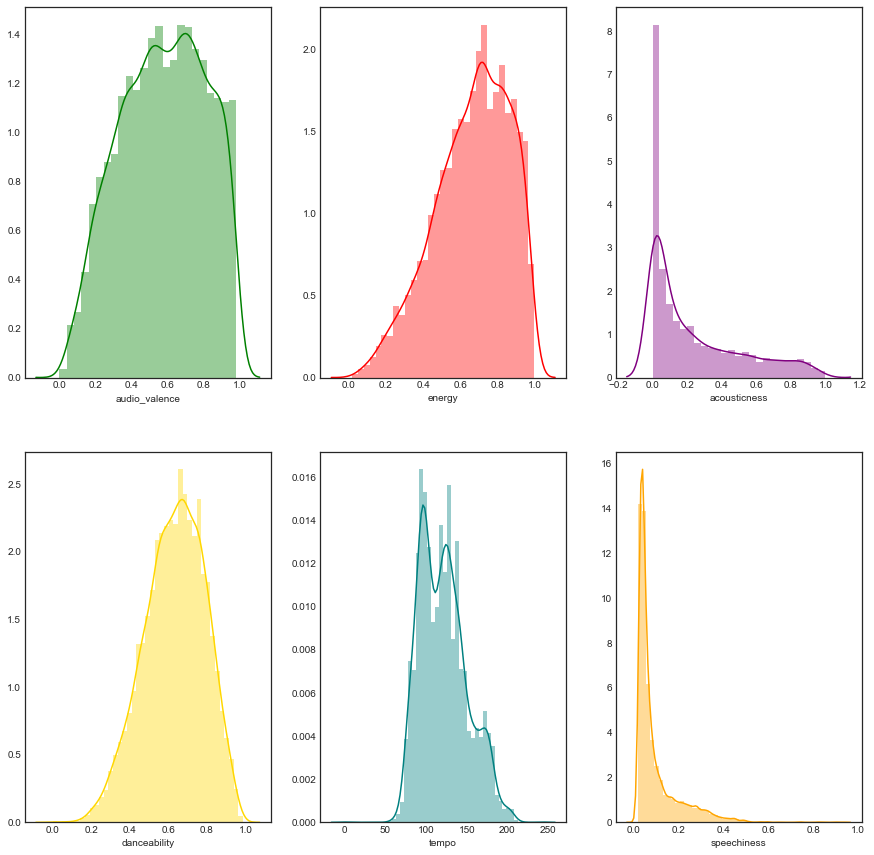

In [21]:
f, axes = plt.subplots(2, 3, figsize=(15,15), sharex=False)
sns.distplot( all_genres_df["audio_valence"] , color="green", ax=axes[0, 0])
sns.distplot( all_genres_df["energy"] , color="red", ax=axes[0, 1])
sns.distplot( all_genres_df["acousticness"] , color="purple", ax=axes[0, 2])
sns.distplot( all_genres_df["danceability"] , color="gold", ax=axes[1, 0])
sns.distplot( all_genres_df["tempo"] , color="teal", ax=axes[1, 1])
sns.distplot( all_genres_df["speechiness"] , color="orange", ax=axes[1, 2])

plt.show()

Audio valence, energy, and danceability seem to have a near normal distribution. Tempo seems to be very erratic, and speechiness and acousticness seem to be very skewed. These observations may help to match a distribution to each set of data in order to gain a better understanding of the underlying natural phenomena which affect these values.

## Analysis

Now that the general shape of the data is known, it may now be useful to go more in depth with the analysis. The following bar plot shows a very interesting phenomenon related to our study: each genre, for the most part, uses major keys in their songs more often than minor keys.

Text(0.5,1,'Modality Distribution Within Genres')

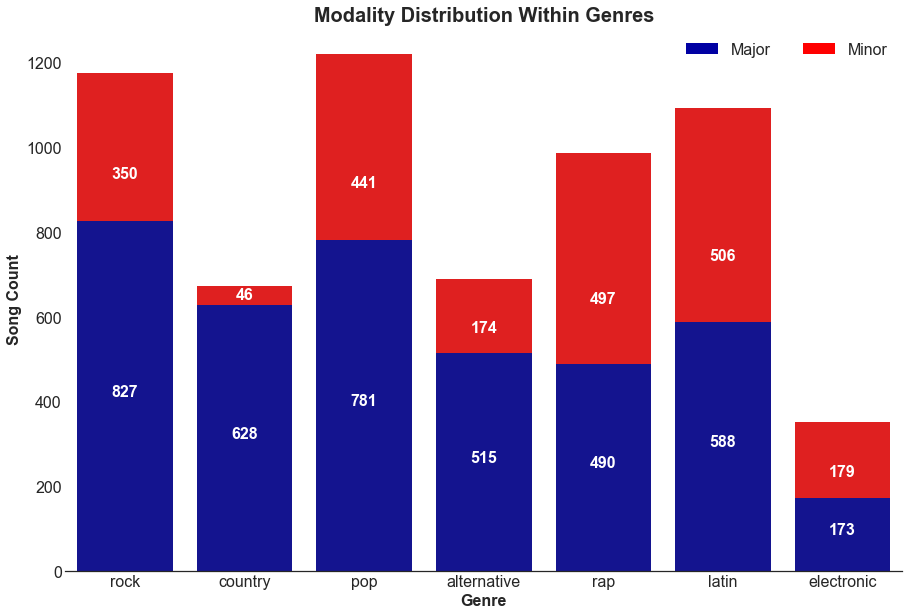

In [22]:
# count within each genre the number of major and minor keys
minor = np.array([rock_mode[0], country_mode[0], pop_mode[0], alt_mode[0],rap_mode[0], latin_mode[0], electronic_mode[0]])
major = np.array([rock_mode[1], country_mode[1], pop_mode[1], alt_mode[1],rap_mode[1], latin_mode[1], electronic_mode[1]])
total_modes = major + minor

# genre labels
genres = ["rock", "country", "pop", "alternative", "rap", "latin", "electronic"]

sns.set_style("white")
sns.set_context({"figure.figsize": (15, 10)})

#Plot 1 - background - "total" (top) series
ax1 = sns.barplot(x = genres, y = total_modes, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = genres, y = major, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Major', 'Minor'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Song Count", weight = "bold")
bottom_plot.set_xlabel("Genre", weight = "bold")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

X = np.array(range(0,7))
for i in X:
    ax1.text(i,major[i]/2, major[i], color='white', ha="center", fontsize = 16, weight = "bold")
    bottom_plot.text(i, major[i] + minor[i]/3.5, minor[i], color ="white", ha = "center", fontsize = 16, weight = "bold")

ax1.set_title("Modality Distribution Within Genres", fontsize = 20, weight = "bold", ha= "center")

In general, minor keys tend to sound meloncholy and major keys tend to sound cheerful. However, listening to any particular song (major or minor) in most genres makes it really hard to tell whether the song is in a major or minor scale by this measure. As it turns out, audio valence is a great feature to capture this idea. 

Due to the phenomenon shown in the bar plot, perhaps then the modality of a song may not be a good distinguisher of genres. This is even more apparent upon the realization that it is, in fact, a binary feature. A song can only be either major or minor: there's no grey area here. Thus, how could it possibly make a distinction between, say, several-hundred different genres?

As different genres often refer to different moods or states of mind, then it is not absurd to claim that audio valence can be a good indication of genre. However, it certainly is not the only trait of a song that dictates the genre. Thus being so, observe the following heat maps: the x-axis determines the genre, the y-axis determines the key, and the color of the cell determines the audio valence. There is a heat map for major songs, one for minor songs, and one including both major and minor songs. Between each genre, how do both the key and audio valence vary?

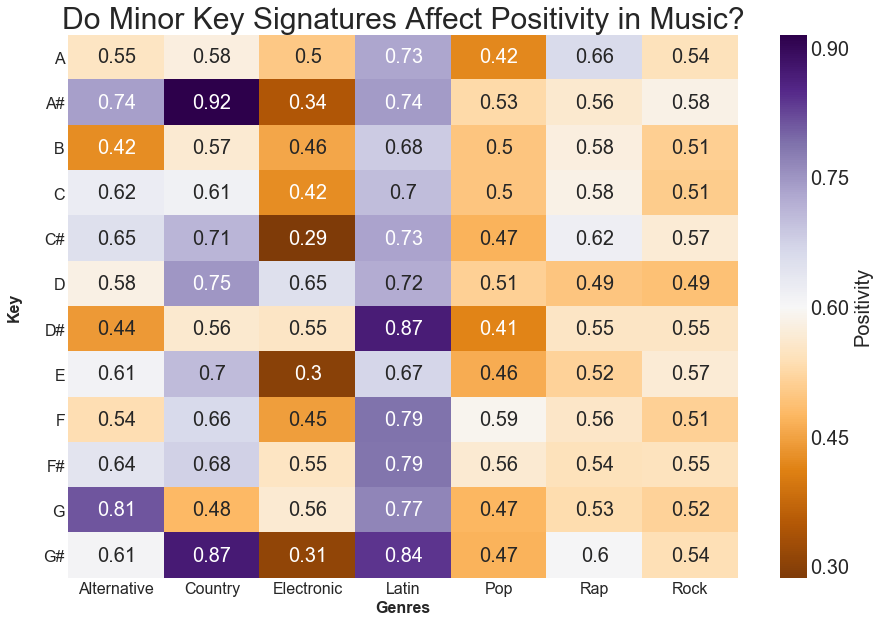

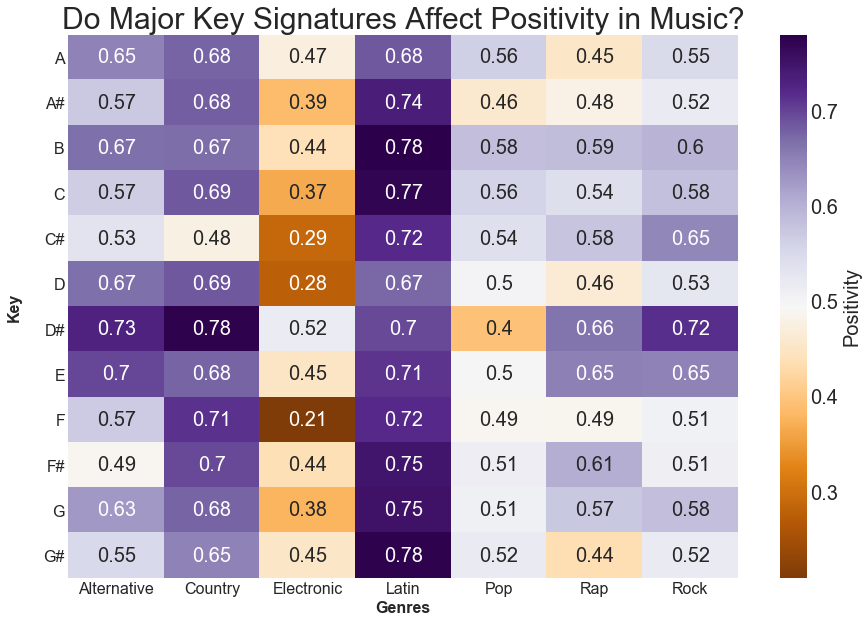

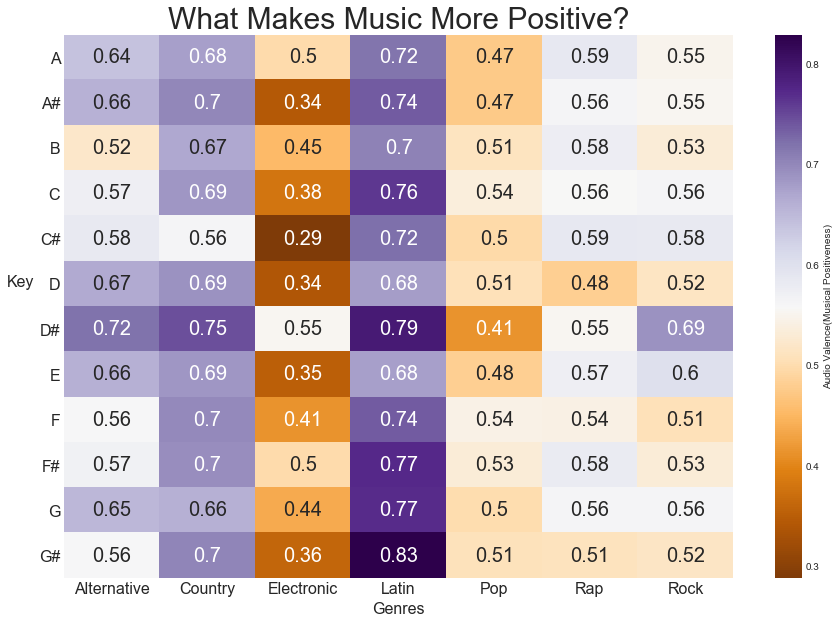

In [23]:
genres_minor = all_genres_df[all_genres_df.audio_mode == 0]
genres_major = all_genres_df[all_genres_df.audio_mode == 1]

minor_valence = pd.pivot_table(genres_minor,values='audio_valence', 
                                           index='key_note', columns='Genre', aggfunc=np.median)
major_valence = pd.pivot_table(genres_major,values='audio_valence', 
                                           index='key_note', columns='Genre', aggfunc=np.median)

songdata_valence = pd.pivot_table(all_genres_df,values='audio_valence', index='key_note', 
                                  columns='Genre', aggfunc=np.median)

# Minor songs

sns.set_context({"figure.figsize": (15, 10)})
ax = sns.heatmap(minor_valence, cmap= 'PuOr',annot= True, fmt='0.2', annot_kws={'fontsize':20}, 
                 cbar_kws={'label': 'Positivity'})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)


ax.figure.axes[-1].yaxis.label.set_size(20)

plt.yticks(rotation = 0)

plt.title('Do Minor Key Signatures Affect Positivity in Music?',fontsize=30)
plt.ylabel('Key\n',fontsize=20, weight = "bold").set_rotation(90)
plt.xlabel('Genres',fontsize=20, weight = "bold").set_rotation(0)

#Set fonts to consistent 16pt size
for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.show()

# Major songs

sns.set_context({"figure.figsize": (15, 10)})
ax = sns.heatmap(major_valence, cmap= 'PuOr',annot= True, fmt='0.2', annot_kws={'fontsize':20}, 
                 cbar_kws={'label': 'Positivity'})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)


ax.figure.axes[-1].yaxis.label.set_size(20)

plt.yticks(rotation = 0)

plt.title('Do Major Key Signatures Affect Positivity in Music?',fontsize=30)
plt.ylabel('Key\n',fontsize=20, weight = "bold").set_rotation(90)
plt.xlabel('Genres',fontsize=20, weight = "bold").set_rotation(0)

#Set fonts to consistent 16pt size
for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.show()

# Major and minor songs

sns.set_context({"figure.figsize": (15, 10)})
ax = sns.heatmap(songdata_valence, cmap= 'PuOr',annot= True, fmt='0.2', annot_kws={'fontsize':20}, 
                 cbar_kws={'label': 'Audio Valence(Musical Positiveness)'})

plt.yticks(rotation = 0)
plt.title('What Makes Music More Positive?',fontsize=30)
plt.ylabel('Key\n',fontsize=20,labelpad=18).set_rotation(0)
plt.xlabel('Genres',fontsize=20,labelpad=5).set_rotation(0)
#Set fonts to consistent 16pt size
for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)
#ax.figure.axes[-1].yaxis.label.set_size(18)

plt.show()

Clearly, by the presented data, latin music is the "happiest" type of music. Inversely, rap and pop music seem to be the "saddest" types of music. Also notice that audio valence is not greatly affected by the key of a song. This may have to do with modality (as discussed above); so, it may be that key and modality together carry some sort of important information, the likes of which is purportedly captured by audio valence also. 

What about a better way to look at audio valence than just numbers? A better intuition of how audio valence differs between genres can be gathered from the following violin plot.

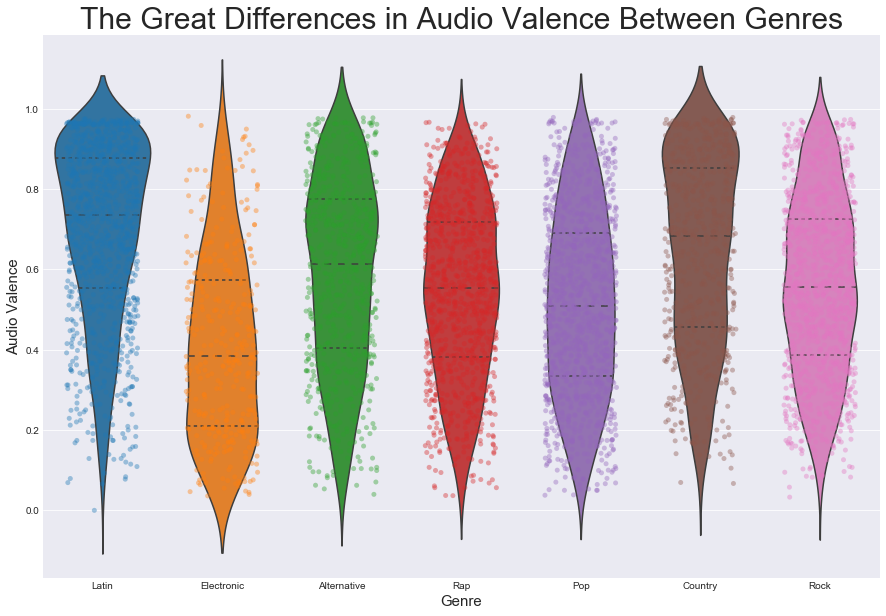

In [25]:
sns.set_style('darkgrid')

vln_plot = sns.violinplot(x='Genre', y='audio_valence', data=all_genres_df, inner="quartile",alpha=.1)
vln_plot = sns.stripplot(x='Genre', y='audio_valence', data=all_genres_df, jitter=0.3,alpha=.4)

plt.title('The Great Differences in Audio Valence Between Genres',fontsize=30)
plt.ylabel('Audio Valence',fontsize=15).set_rotation(90)
plt.xlabel('Genre',fontsize=15).set_rotation(0)

plt.show()

This plot gives a much clearer understanding of the distribution of each genre's data. Latin's audio valence seems to be well above the generic average. This seems apparently so with country, and inversely so with electronic music as well. Counterintuitively, pop seems to have a very low average of audio valence. To compare each genre even further, consider the following novel plot!

In [37]:
avg_latin_df = latin_df.mean(axis = 0, numeric_only = True)
avg_electronic_df = electronic_df.mean(axis = 0, numeric_only = True)
avg_alt_df = alt_df.mean(axis = 0, numeric_only = True)
avg_rap_df = rap_df.mean(axis = 0, numeric_only = True)
avg_pop_df = pop_df.mean(axis = 0, numeric_only = True)
avg_country_df = country_df.mean(axis = 0, numeric_only = True)
avg_rock_df = rock_df.mean(axis = 0, numeric_only = True)
avg_df = pd.concat([avg_latin_df, avg_electronic_df, avg_alt_df, avg_rap_df, avg_pop_df, avg_country_df, avg_rock_df])
avg_latin_df


song_popularity         51.563071
song_duration_ms    241947.273309
acousticness             0.299080
danceability             0.693098
energy                   0.697898
instrumentalness         0.034985
key                      5.350091
liveness                 0.171489
loudness                -6.702196
audio_mode               0.537477
speechiness              0.092544
tempo                  119.885182
time_signature           3.970750
audio_valence            0.693289
dtype: float64